# The Portrayal of Artificial Intelligence in Science Fiction Literature

## Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv("dataset_final.csv", delimiter=";")
data = data.replace("nA", np.nan)

In [3]:
data.head()

,year,title,name,short name,gender (5),manifestation,physical (5),difference,technical (3),consciousness (5),...,quantity (3),warrior,rebellious,harmed humans,harms creator,more control,world domination,alien technology,author gender,explicit mention of gender
0,1954,They'd Rather Be Right (aka The Forever Machine),"Bossy, the synthetic brain",Bossy,4.0,"""her rejuvenation power""",1.0,computer with display,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1966,The Moon Is a Harsh Mistress,"HOLMES IV, Mike",Mike,2.0,"male name, referenced as ""he""",1.0,black box,1.0,3.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1968,Stand on Zanzibar,Shalmaneser,Shal,2.0,"""This was the one he - I mean it - rated highest""",1.0,"white metal, 18 to 11 inch",1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,1973,Rendezvous with Rama,Biots,Biots,3.0,none,1.0,"crablike, starfish, shark, spider, metallic su...",1.0,1.0,...,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1975,The Female Man,Davy,Davy,1.5,"male, in name and in body",4.0,? Controlled mind?,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Count of Books and AIs over Years

In [4]:
yearbins = ["1951", "1956", "1961", "1966", "1971", "1976", "1981", 
            "1986", "1991", "1996", "2001", "2006", "2011", "2016"]

In [5]:
book_num = [1,0,0,2,2,2,5,5,6,4,2,2,9,3]

In [6]:
ai_num = [1,0,0,2,2,2,9,6,6,6,4,2,14,4]

In [7]:
df = [yearbins, book_num, ai_num]

In [8]:
df = pd.DataFrame() 

In [9]:
df['years'] = pd.Series(yearbins)
df['book number'] = pd.Series(book_num)
df['AI number'] = pd.Series(ai_num)

In [10]:
df = df.set_index('years')
#df

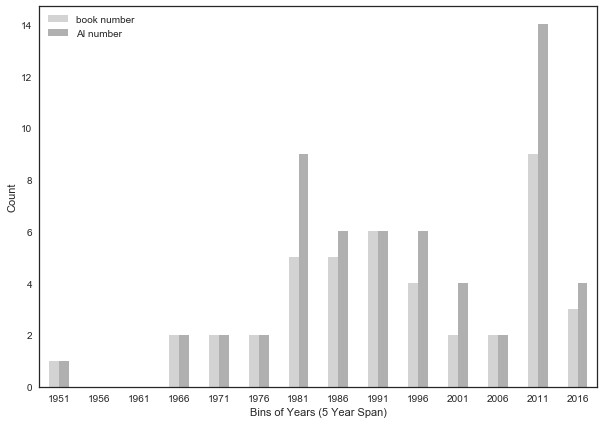

In [11]:
sns.set(style="white", palette=sns.dark_palette("lightgrey", reverse=True))
test = df.plot(kind= 'bar', secondary_y= 'ai_number', rot= 0, figsize=(10,7))
plt.ylabel("Count")
plt.xlabel("Bins of Years (5 Year Span)")
plt.show()

# hypothesis 1.1 - male/female

The AI is rather presented as a male than as a female.

In [12]:
gender_cat = pd.Categorical(data["gender (5)"], categories=["1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"])

In [13]:
gender = data["gender (5)"].replace(["1.0", "1.5", "2.0"], "male").replace(["4.0", "4.5", "5.0"], "female").replace(["3.0", "3.5", "2.5"], "neutral").replace([np.nan, "nb", "var"], "other")

In [14]:
gender.value_counts()

male       23
neutral    19
female     11
other       6
Name: gender (5), dtype: int64

In [15]:
#sns.set(style = "white", palette = sns.dark_palette("black"))
#sns.distplot(data["gender (5)"].astype(str), bins=9, kde=False, rug=True)
#plt.ylabel("count")
#plt.xlabel("gender (male - female)")

# hypothesis 1.2 - mentioning of gender and gender correlation

(a) When the topic of the gender of an AI is explicitly mentioned, it is more probably female than male. (b) When gender is only mentioned and not discussed more deeply, it is more probably male than female.

In [16]:
mentioned = data["explicit mention of gender"]

In [17]:
df = pd.crosstab(gender, mentioned)
df.loc["Total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

explicit mention of gender,0.0,0.5,1.0
gender (5),,,
female,7,1,3
male,18,3,2
neutral,17,1,1
other,4,1,0
Total,46,6,6


In [18]:
df = pd.crosstab(gender, mentioned, normalize="index")
df

explicit mention of gender,0.0,0.5,1.0
gender (5),,,
female,0.636364,0.090909,0.272727
male,0.782609,0.130435,0.086957
neutral,0.894737,0.052632,0.052632
other,0.800000,0.200000,0.000000


In [19]:
df = pd.crosstab(gender, mentioned, normalize="columns")
df

explicit mention of gender,0.0,0.5,1.0
gender (5),,,
female,0.152174,0.166667,0.500000
male,0.391304,0.500000,0.333333
neutral,0.369565,0.166667,0.166667
other,0.086957,0.166667,0.000000


In [20]:
data["name"][mentioned == 1]

4                                      Davy
22                                      Yod
43                         Anaander Mianaai
44    Breq from the Gerenade, Breq Mianaani
46                                  Rupetta
55                                Murderbot
Name: name, dtype: object

In [21]:
df = df.transpose()

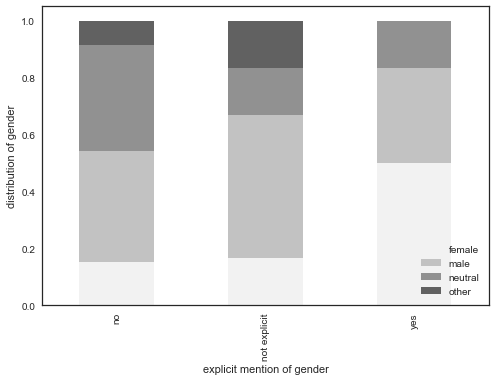

In [22]:
sns.set(style = "white", palette = sns.light_palette("black"))
df.plot.bar(stacked=True)
#labels = ["servant", "changing", "no servant"]
plt.legend()
plt.ylabel("distribution of gender")
bars = ("no", "not explicit", "yes")
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

# hypothesis 1.3 - creator/creation

 When the creator is male, the created AI is more probably female than male.

In [23]:
female_creator = data["female creator"]

In [24]:
df = pd.crosstab(gender, female_creator)
df.loc["Total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

female creator,0,0.25,0.5,1
gender (5),,,,
female,1,0,0,3
male,8,2,2,2
neutral,2,0,0,1
other,1,0,1,0
Total,12,2,3,6


In [25]:
df = pd.crosstab(gender, female_creator, normalize="index")
df

female creator,0,0.25,0.5,1
gender (5),,,,
female,0.250000,0.000000,0.000000,0.750000
male,0.571429,0.142857,0.142857,0.142857
neutral,0.666667,0.000000,0.000000,0.333333
other,0.500000,0.000000,0.500000,0.000000


In [26]:
df = pd.crosstab(gender, female_creator, normalize="columns")
df

female creator,0,0.25,0.5,1
gender (5),,,,
female,0.083333,0.0,0.000000,0.500000
male,0.666667,1.0,0.666667,0.333333
neutral,0.166667,0.0,0.000000,0.166667
other,0.083333,0.0,0.333333,0.000000


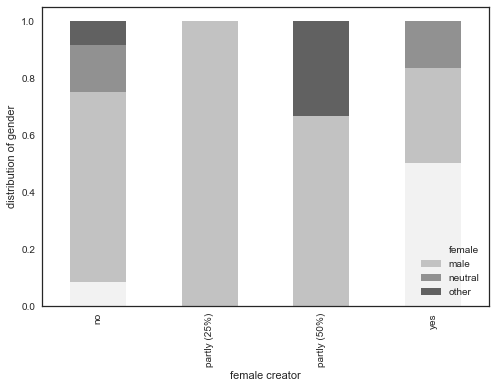

In [27]:
df = df.transpose()
sns.set(style = "white", palette = sns.light_palette("black"))
df.plot.bar(stacked=True)
plt.ylabel("distribution of gender")
plt.legend(title = "")
bars = ("no", "partly (25%)", "partly (50%)", "yes")
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

In [28]:
data["name"][(female_creator == "0") & (gender == "female")]

0    Bossy, the synthetic brain
Name: name, dtype: object

In [29]:
data["name"][(female_creator == "1") & (gender == "male")]

4           Davy
12    Wintermute
Name: name, dtype: object

# hypothesis 1.4 - technical form and gender correlation

(a) Female AIs tend to be more in cloud form, (b) male AIs tend to be more in physical form.

In [30]:
form = data["technical (3)"]

In [31]:
df = pd.crosstab(gender, form)
df.loc["Total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

technical (3),1.0,2.0,3.0
gender (5),,,
female,6,2,3
male,11,5,7
neutral,13,4,2
other,2,2,1
Total,32,13,13


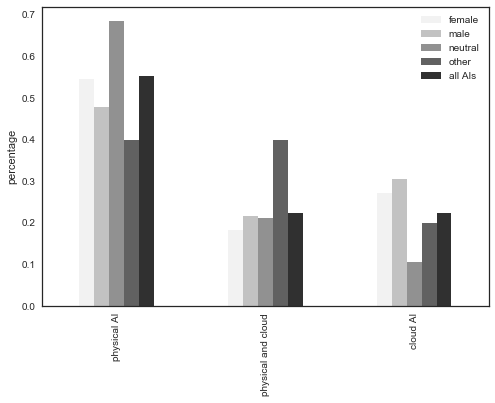

In [32]:
df = pd.crosstab(gender, form, normalize="index")
df.loc["all AIs"] = [0.552, 0.224, 0.224]
df = df.transpose()
sns.set(style = "white", palette = sns.light_palette("black"))
df.plot.bar()
plt.ylabel("percentage")
plt.xlabel("")
plt.legend(title = "")
bars = ("physical AI", "physical and cloud", "cloud AI")
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

In [33]:
df = pd.crosstab(gender, form, normalize="index")
df

technical (3),1.0,2.0,3.0
gender (5),,,
female,0.545455,0.181818,0.272727
male,0.478261,0.217391,0.304348
neutral,0.684211,0.210526,0.105263
other,0.400000,0.400000,0.200000


In [34]:
df = pd.crosstab(gender, form, normalize="columns")
df

technical (3),1.0,2.0,3.0
gender (5),,,
female,0.18750,0.153846,0.230769
male,0.34375,0.384615,0.538462
neutral,0.40625,0.307692,0.153846
other,0.06250,0.153846,0.076923


In [35]:
data["name"][((gender == "female") | (gender == "male")) & (form == 3)]

11          Dixie
12     Wintermute
13    Neuromancer
16           Jane
23       Art Fish
25          Alice
26    Paul Durham
38         Rabbit
42        Pauline
52     Supervisor
Name: name, dtype: object

In [36]:
data["name"][((gender == "other") | (gender == "neutral")) & (form == 3)]

20        TechnoCore
32            Ganesh
35    Lobster colony
Name: name, dtype: object

In [37]:
data["name"][(gender == "male") & (form == 1)]

1        HOLMES IV, Mike
2            Shalmaneser
4                   Davy
5                Hangman
6     Sigfrid von Shrink
7          Ralph Numbers
9          Cobb Anderson
10               Tik-Tok
15               Cyclops
22                   Yod
56            John of Us
Name: name, dtype: object

# hypothesis 2.1 - servant

The AI appears as a servant for human beings.

In [38]:
servant = data["servant (3)"].dropna()

In [39]:
df = pd.crosstab(gender, servant, rownames=["gender"], colnames=["servant"])
df.loc["total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

servant,1.0,2.0,3.0
gender,,,
female,5,2,4
male,7,3,13
neutral,11,1,7
other,2,0,3
total,25,6,27


In [40]:
df = pd.crosstab(gender, servant, rownames=["gender"], colnames=["servant"], normalize="index")
df

servant,1.0,2.0,3.0
gender,,,
female,0.454545,0.181818,0.363636
male,0.304348,0.130435,0.565217
neutral,0.578947,0.052632,0.368421
other,0.400000,0.000000,0.600000


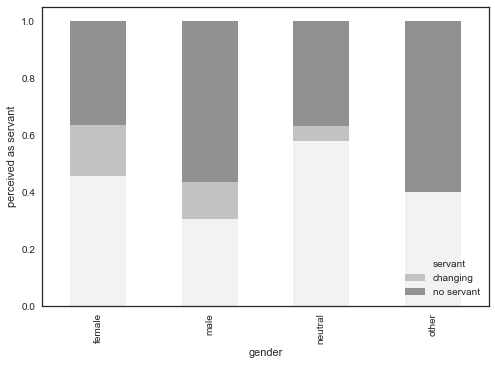

In [41]:
sns.set(style = "white", palette = sns.light_palette("black"))
df.plot.bar(stacked=True)
labels = ["servant", "changing", "no servant"]
plt.legend(labels, loc="lower right")
plt.ylabel("perceived as servant")
plt.show()

In [42]:
data["name"][(data["servant (3)"] == 3) & ((data["gender (5)"] == 4) | (data["gender (5)"] == 4.5) | (data["gender (5)"] == 5))]

Series([], Name: name, dtype: object)

# hypothesis 2.2.1 - danger (general)

The AI is dangerous for (a) human beings in general.

In [43]:
data["danger"] = pd.to_numeric(data["rebellious"]) + pd.to_numeric(data["harmed humans"]) + pd.to_numeric(data["more control"]) + pd.to_numeric(data["world domination"])

In [44]:
danger = data["danger"]

In [45]:
df = pd.crosstab(gender, danger, rownames=["gender"], colnames=["danger"])
df.loc["total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

danger,0.0,1.0,2.0,3.0,4.0
gender,,,,,
female,5,3,1,0,2
male,7,4,6,4,2
neutral,11,3,0,3,2
other,2,1,2,0,0
total,25,11,9,7,6


In [46]:
df = pd.crosstab(gender, danger, rownames=["gender"], colnames=["danger"], normalize="index")
df

danger,0.0,1.0,2.0,3.0,4.0
gender,,,,,
female,0.454545,0.272727,0.090909,0.000000,0.181818
male,0.304348,0.173913,0.260870,0.173913,0.086957
neutral,0.578947,0.157895,0.000000,0.157895,0.105263
other,0.400000,0.200000,0.400000,0.000000,0.000000


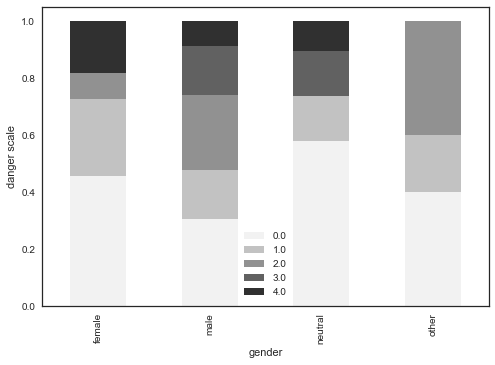

In [47]:
sns.set(style = "white", palette = sns.light_palette("black"))
df.plot.bar(stacked=True)
#labels = ["servant", "changing", "no servant"]
plt.legend()
plt.ylabel("danger scale")
plt.show()

In [48]:
data["name"][(danger == 4.0)]

8     Big 12 (GAX, TEX, BEX, MEX, Mr Frosti)
12                                Wintermute
24                                the Blight
43                          Anaander Mianaai
49                               Su-Yong Shu
53                              Bartholomäus
Name: name, dtype: object

# hypothesis 2.2.2 - danger (creator)

The AI is dangerous for (b) its owner/creator.

In [49]:
harms_creator = data["harms creator"]

In [50]:
df = pd.crosstab(gender, harms_creator, rownames=["gender"], colnames=["harms creator"])
df.loc["total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

harms creator,0.0,1.0
gender,,
female,10,1
male,20,3
neutral,18,1
other,5,0
total,53,5


In [51]:
df = pd.crosstab(gender, harms_creator, rownames=["gender"], colnames=["harms creator"], normalize="index")
df

harms creator,0.0,1.0
gender,,
female,0.909091,0.090909
male,0.869565,0.130435
neutral,0.947368,0.052632
other,1.000000,0.000000


In [52]:
data["name"][data["harms creator"] == 1]

5                                    Hangman
7                              Ralph Numbers
8     Big 12 (GAX, TEX, BEX, MEX, Mr Frosti)
36                           Aineko, AI Neko
44     Breq from the Gerenade, Breq Mianaani
Name: name, dtype: object

# hypothesis 2.2.3 - danger (humanity)

The AI is dangerous for (c) humanity in total.

In [53]:
world = data["world domination"]

In [54]:
df = pd.crosstab(gender, world, rownames=["gender"], colnames=["world domination"])
df.loc["total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

world domination,0.0,1.0
gender,,
female,9,2
male,20,3
neutral,15,4
other,5,0
total,49,9


In [55]:
df = pd.crosstab(gender, world, rownames=["gender"], colnames=["world domination"], normalize="index")
df

world domination,0.0,1.0
gender,,
female,0.818182,0.181818
male,0.869565,0.130435
neutral,0.789474,0.210526
other,1.000000,0.000000


In [56]:
data["name"][data["world domination"] == 1]

8     Big 12 (GAX, TEX, BEX, MEX, Mr Frosti)
12                                Wintermute
20                                TechnoCore
24                                the Blight
43                          Anaander Mianaai
49                               Su-Yong Shu
50                                The Sophon
52                                Supervisor
53                              Bartholomäus
Name: name, dtype: object

# hypothesis 2.3 - warrior

The AI is produced and used as a warrior.

In [57]:
warrior = data["warrior"]

In [58]:
df = pd.crosstab(gender, warrior, rownames=["gender"], colnames=["warrior"])
df.loc["total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

warrior,0.0,1.0
gender,,
female,9,2
male,21,2
neutral,10,9
other,5,0
total,45,13


In [59]:
df = pd.crosstab(gender, warrior, rownames=["gender"], colnames=["warrior"], normalize="index")
df

warrior,0.0,1.0
gender,,
female,0.818182,0.181818
male,0.913043,0.086957
neutral,0.526316,0.473684
other,1.000000,0.000000


In [60]:
data["name"][data["warrior"] == 1]

3                                     Biots
5                                   Hangman
21                         Skaffen-Amtiskaw
22                                      Yod
28                               Churt Lyne
29                          Sisela Ytheleus
31                         Rhadamanth Nemes
40                                 Nanobots
44    Breq from the Gerenade, Breq Mianaani
45        Justice of Toren One Esk Nineteen
48                                     Ship
50                               The Sophon
55                                Murderbot
Name: name, dtype: object

# hypothesis 2.4 - body vs hyper

The AI is either presented as body AI or as hyper AI.

In [61]:
# is body ai: physical or both, intimacy friendship or love, regarded as subject or changed
# is hyper ai: cloud or both, wants control, world domination

In [62]:
body1 = data["technical (3)"].replace([1, 2], 1).replace(3, 0)
body2 = data["intimacy (4)"].replace([1, 2], 0).replace([3, 4], 1)
body3 = data["subject (3)"].replace([1, 2], 1).replace(3, 0)
body4 = data["physical (5)"].replace([3, 2, 1], 0).replace([4, 5], 1)
body = body1 + body2 + body3 + body4

In [63]:
df = pd.crosstab(gender, body, colnames=["body-scale"])
df.loc["Total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

body-scale,0.0,1.0,2.0,3.0,4.0
gender (5),,,,,
female,1,1,2,5,2
male,1,7,7,4,4
neutral,2,10,4,2,1
other,0,2,1,2,0
Total,4,20,14,13,7


In [64]:
df = pd.crosstab(gender, body, colnames=["body-scale"], normalize="index")
df

body-scale,0.0,1.0,2.0,3.0,4.0
gender (5),,,,,
female,0.090909,0.090909,0.181818,0.454545,0.181818
male,0.043478,0.304348,0.304348,0.173913,0.173913
neutral,0.105263,0.526316,0.210526,0.105263,0.052632
other,0.000000,0.400000,0.200000,0.400000,0.000000


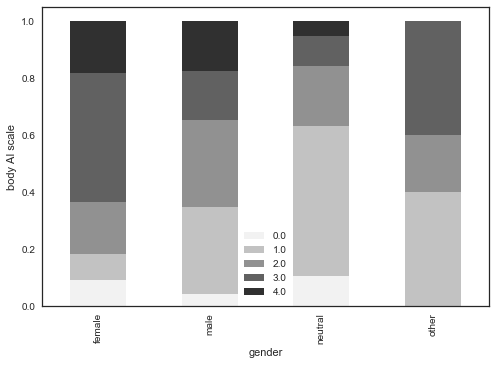

In [65]:
sns.set(style = "white", palette = sns.light_palette("black"))
df.plot.bar(stacked=True)
#labels = ["servant", "changing", "no servant"]
plt.legend()
plt.ylabel("body AI scale")
plt.xlabel("gender")
plt.show()

In [66]:
data["name"][body == 4]

9                             Cobb Anderson
17                      Johnny (John Keats)
19                            Joseph Severn
22                                      Yod
44    Breq from the Gerenade, Breq Mianaani
46                                  Rupetta
55                                Murderbot
Name: name, dtype: object

In [67]:
hyper1 = data["technical (3)"].replace(1, 0).replace([2, 3], 1)
hyper2 = data["more control"].replace(1, 1).replace(0, 0)
hyper3 = data["world domination"].replace("1", 1).replace(["0", "0.5"], 0)
hyper = hyper1 + hyper2 + hyper3

In [68]:
df = pd.crosstab(gender, hyper, colnames=["hyper-scale"])
df.loc["Total"] = df.loc["female"] + df.loc["male"] + df.loc["neutral"] + df.loc["other"]
df

hyper-scale,0.0,1.0,2.0,3.0
gender (5),,,,
female,6,3,0,2
male,7,7,7,2
neutral,9,6,2,2
other,2,1,2,0
Total,24,17,11,6


In [69]:
df = pd.crosstab(gender, hyper, colnames=["hyper-scale"], normalize="index")
df

hyper-scale,0.0,1.0,2.0,3.0
gender (5),,,,
female,0.545455,0.272727,0.000000,0.181818
male,0.304348,0.304348,0.304348,0.086957
neutral,0.473684,0.315789,0.105263,0.105263
other,0.400000,0.200000,0.400000,0.000000


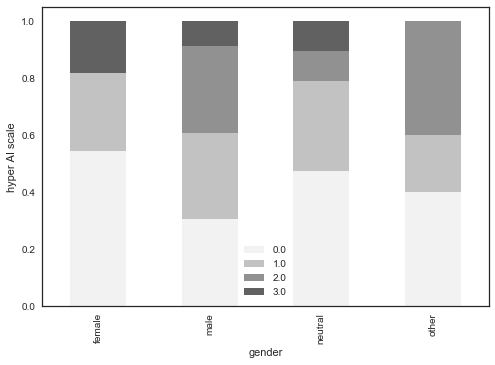

In [70]:
sns.set(style = "white", palette = sns.light_palette("black"))
df.plot.bar(stacked=True)
#labels = ["servant", "changing", "no servant"]
plt.legend()
plt.ylabel("hyper AI scale")
plt.xlabel("gender")
plt.show()

In [71]:
data["name"][hyper == 3]

8     Big 12 (GAX, TEX, BEX, MEX, Mr Frosti)
12                                Wintermute
20                                TechnoCore
43                          Anaander Mianaai
49                               Su-Yong Shu
53                              Bartholomäus
Name: name, dtype: object

# hypothesis 3 - variation over time

The younger the story (a) the more android the AI is presented, (b) the more the AI is seen as a subject, (c) the less the AI is seen as a servant, (d) the less threatening the AI is presented, (e) the more affection
appears toward the AI.

In [72]:
def best_fit(X, Y):
    X = X.astype(int)
    Y = Y.astype(int)

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar
    
    r2 = r2_score(Y, [a + b * xi for xi in X])
    pcc = pearsonr(X, Y)

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    print('R² = ', r2)
    print("Spearmans Correlation Coefficient = ", X.corr(Y, method="spearman"))

    return a, b, r2

In [73]:
def scatter_line_text(X, Y, T, title):
    sns.set(style="white", palette=sns.dark_palette("black"))
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    plt.scatter(X, Y)
    a, b, r2 = best_fit(X, Y)
    yfit = [a + b * xi for xi in X]
    plt.plot(X, yfit)

    texts = []
    for x, y, s in zip(X, Y, T):
        texts.append(plt.text(x, y, s))

    plt.xlabel(title[0])
    plt.ylabel(title[1])
    plt.title(title[2])
    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

    plt.grid()
    plt.show()

In [74]:
year = data["year"]

In [75]:
android = data["physical (5)"]

best fit line:
y = -32.92 + 0.02x
R² =  0.039394485830319126
Spearmans Correlation Coefficient =  0.1907450919041437


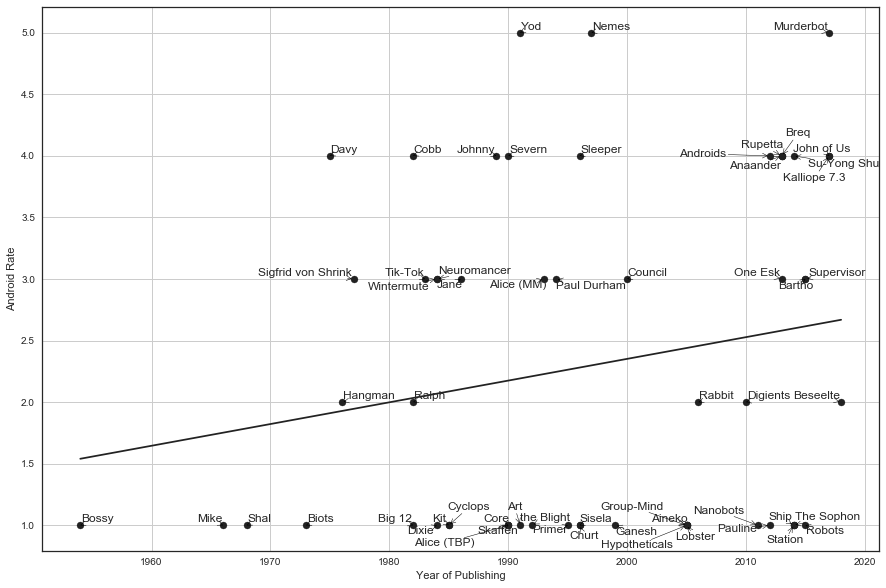

In [76]:
scatter_line_text(year[android.dropna().index], 
                  pd.to_numeric(android.dropna()),
                  data["short name"][android.dropna().index], 
                  ["Year of Publishing", "Android Rate", ""])

In [77]:
subject = data["subject (3)"]

best fit line:
y = 12.15 + -0.01x
R² =  0.007426570710348357
Spearmans Correlation Coefficient =  -0.07048691081839746


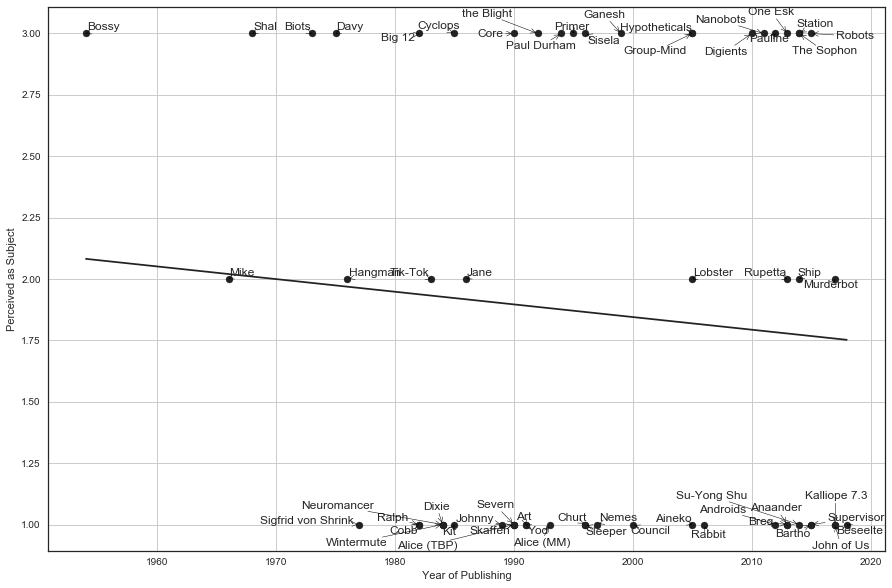

In [78]:
scatter_line_text(year[subject.dropna().index], 
                  pd.to_numeric(subject.dropna()),
                  data["short name"][subject.dropna().index], 
                  ["Year of Publishing", "Perceived as Subject", ""])

In [79]:
servant = data["servant (3)"]

best fit line:
y = -9.88 + 0.01x
R² =  0.009377224473751444
Spearmans Correlation Coefficient =  0.0393337068809139


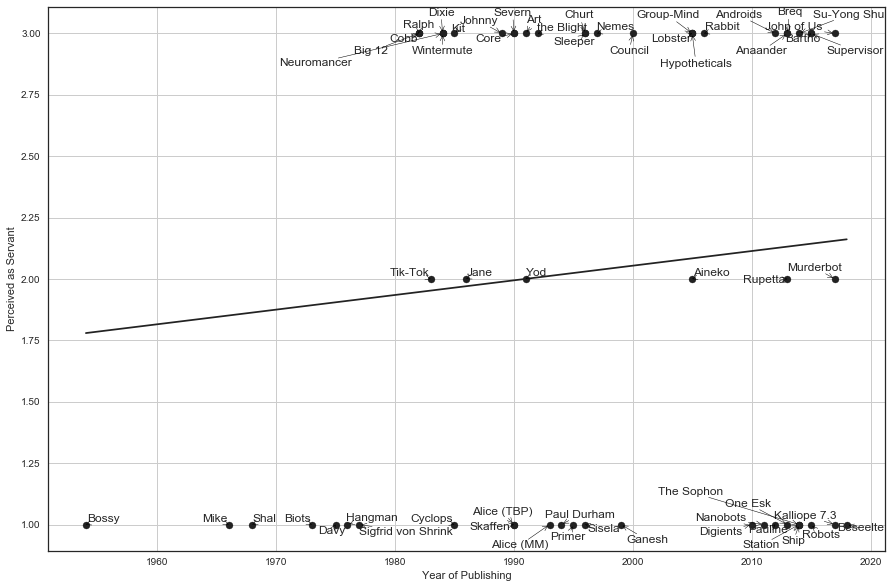

In [80]:
scatter_line_text(year[servant.dropna().index], 
                  pd.to_numeric(servant.dropna()),
                  data["short name"][servant.dropna().index], 
                  ["Year of Publishing", "Perceived as Servant", ""])

In [81]:
pd.crosstab(servant, subject)

subject (3),1.0,2.0,3.0
servant (3),,,
1.0,6,3,16
2.0,2,4,0
3.0,21,1,5


In [82]:
print("Spearmans Correlation Coefficient: ", servant.corr(subject, method="spearman"))

Spearmans Correlation Coefficient:  -0.5134538986270615


best fit line:
y = -7.04 + 0.00x
R² =  0.002125760541498267
Spearmans Correlation Coefficient =  -0.0053675796644054715


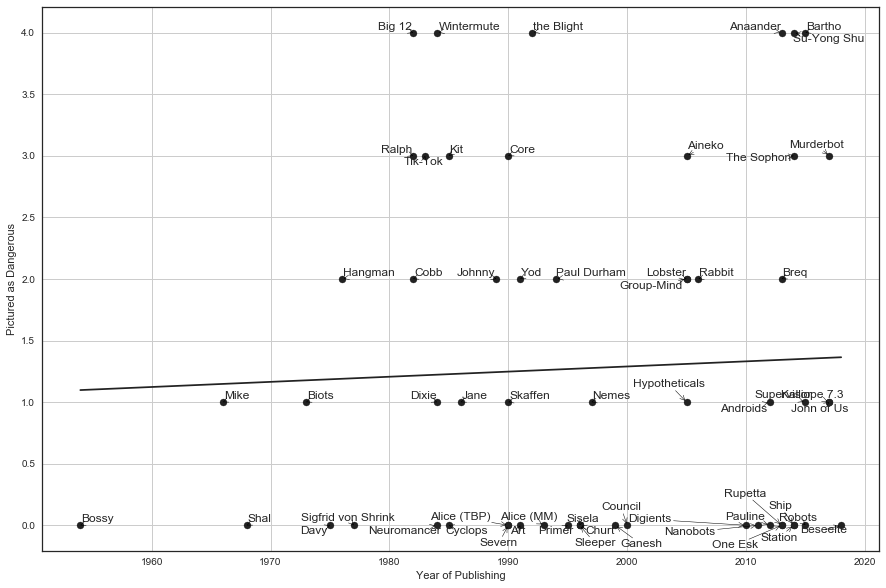

In [83]:
scatter_line_text(year[danger.dropna().index], 
                  pd.to_numeric(danger.dropna()),
                  data["short name"][danger.dropna().index], 
                  ["Year of Publishing", "Pictured as Dangerous", ""])

In [84]:
intimacy = data["intimacy (4)"]

best fit line:
y = 15.41 + -0.01x
R² =  0.00955229863743301
Spearmans Correlation Coefficient =  -0.1400829794732072


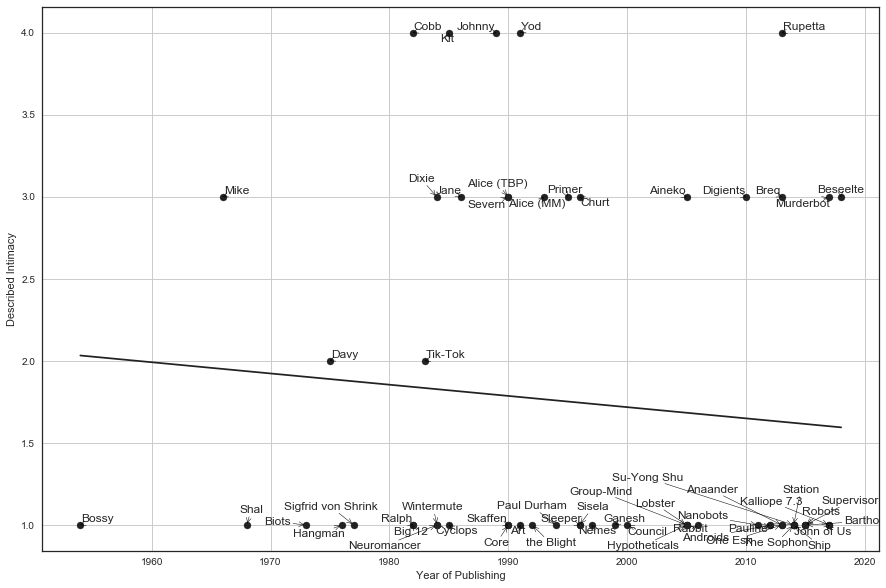

In [85]:
scatter_line_text(year[intimacy.dropna().index], 
                  pd.to_numeric(intimacy.dropna()),
                  data["short name"][intimacy.dropna().index], 
                  ["Year of Publishing", "Described Intimacy", ""])

## Additional Findings

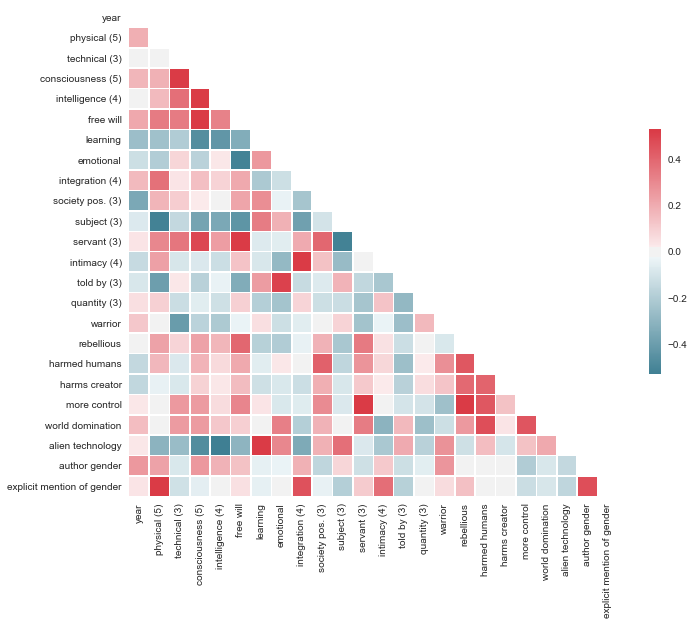

In [86]:
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
data2 = data.iloc[:,:-1]
corr = data2.corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [87]:
print("Spearmans Correlation Coefficient: ", data["author gender"].corr(data["gender (5)"], method="spearman"))

Spearmans Correlation Coefficient:  0.08541444449766288


C:\Users\laris\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


best fit line:
y = -52.34 + 0.03x
R² =  0.12042348849623097
Spearmans Correlation Coefficient =  0.38856115185962115


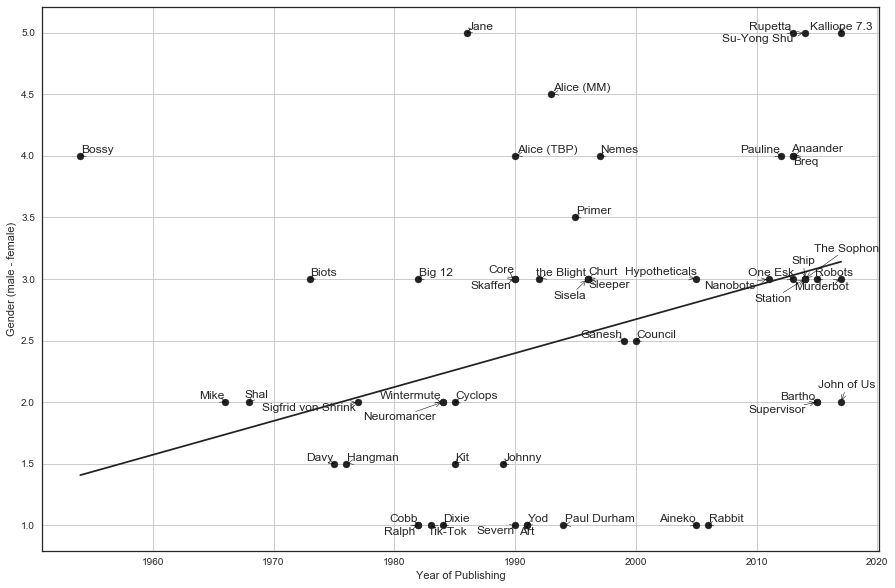

In [88]:
scatter_line_text(year[data["gender (5)"].dropna().index], 
                  pd.to_numeric(data["gender (5)"].dropna()),
                  data["short name"][data["gender (5)"].dropna().index], 
                  ["Year of Publishing", "Gender (male - female)", ""])

## Google Trends Figure

In [89]:
trends = pd.read_csv("google-trends.csv", delimiter=",")

In [90]:
trends.head()

,Month,Topic Artificial Intelligence: (worldwide),Topic Machine Learning: (wordwide)
0,2004-01,86,4
1,2004-02,91,4
2,2004-03,89,5
3,2004-04,89,4
4,2004-05,90,3


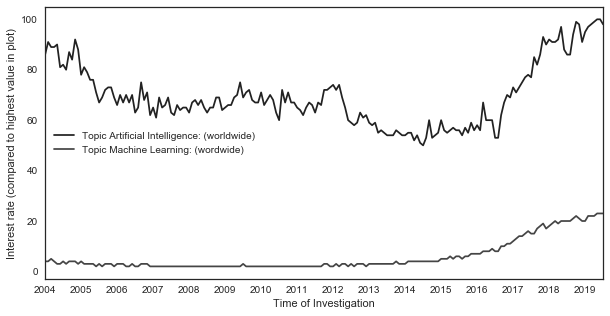

In [91]:
sns.set(style="white", palette=sns.dark_palette("lightgrey"))
test = trends.plot(kind= 'line', secondary_y= 'ai_number', rot= 0, figsize=(10,5))
plt.ylabel("Interest rate (compared to highest value in plot)")
plt.xlabel("Time of Investigation")
my_xticks = ['2004','','','','','','','','','','','','2005','','','','','','','','','','','','2006','','','','','','','','','','','','2007','','','','','','','','','','','','2008','','','','','','','','','','','','2009','','','','','','','','','','','','2010','','','','','','','','','','','','2011','','','','','','','','','','','','2012','','','','','','','','','','','','2013','','','','','','','','','','','','2014','','','','','','','','','','','','2015','','','','','','','','','','','','2016','','','','','','','','','','','','2017','','','','','','','','','','','','2018','','','','','','','','','','','','2019','','','','','','']
plt.xticks(range(0, 186), my_xticks)
plt.show()